## Data Rangling 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
indicators= pd.read_csv ("CaribIndicators.csv")
policy= pd.read_csv("Mat_ChildPolicyCaribb.csv")

In [3]:
countrytrends= indicators[["Year","Country","FemPop","GdpCap","Wrep_age15_49","IncomeGroup","Avg_MMR"]].dropna()

In [4]:
indi_95 =indicators.query("Year==1995")
indi_05 =indicators.query("Year==2005").dropna()
indi_15 =indicators.query("Year==2015").dropna()

In [5]:
indi_95= indi_95.drop(columns=["Prev_Anae","Avg_MMR"]).dropna()

In [6]:
summary95=indi_95.describe()
summary95

,Year,FemPop,GdpCap,Wrep_age15_49,Neonat_MR
count,13.0,1.300000e+01,13.000000,13.000000,13.000000
mean,1995.0,8.398120e+05,11489.523846,415.911846,16.705008
std,0.0,1.396396e+06,7817.411593,683.765246,7.962133
min,1995.0,3.580500e+04,2841.240000,19.512000,8.587730
25%,1995.0,7.719500e+04,7396.840000,36.506000,9.701880
50%,1995.0,1.526180e+05,9959.230000,76.858000,14.489470
75%,1995.0,6.600930e+05,12668.780000,330.850000,18.788610
max,1995.0,3.932406e+06,34716.540000,1996.041000,33.248610


In [7]:
summary05=indi_05.describe()
summary05

,Year,FemPop,GdpCap,Wrep_age15_49,Prev_Anae,Avg_MMR,Neonat_MR
count,13.0,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2005.0,9.596666e+05,14842.744615,498.272692,27.361538,114.538462,14.987480
std,0.0,1.634501e+06,9494.170131,845.733218,9.102430,116.001160,6.966917
min,2005.0,4.223300e+04,2872.030000,24.011000,17.700000,33.000000,7.960430
25%,2005.0,8.332700e+04,9918.050000,46.470000,21.700000,59.000000,9.355620
50%,2005.0,1.786400e+05,13460.580000,91.270000,25.000000,77.000000,12.926480
75%,2005.0,6.922910e+05,15908.300000,369.311000,27.300000,83.000000,16.821690
max,2005.0,4.585534e+06,40401.530000,2373.563000,52.400000,459.000000,29.371150


In [8]:
summary15=indi_15.describe()
summary15

,Year,FemPop,GdpCap,Wrep_age15_49,Prev_Anae,Avg_MMR,Neonat_MR
count,13.0,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2015.0,1.082402e+06,15851.423846,570.184231,24.361538,109.000000,13.281262
std,0.0,1.883032e+06,8738.850481,995.839321,8.789154,121.031676,6.613892
min,2015.0,4.711300e+04,3102.340000,26.132000,16.000000,25.000000,4.249840
25%,2015.0,8.823900e+04,11261.780000,50.925000,19.200000,43.000000,10.065210
50%,2015.0,2.038580e+05,15142.060000,103.962000,21.600000,74.000000,11.018600
75%,2015.0,7.405810e+05,18594.540000,355.087000,23.900000,115.000000,12.681690
max,2015.0,5.317598e+06,36023.590000,2828.054000,49.300000,488.000000,27.069100


In [9]:
mch_95= indi_95.merge(policy,how = "left",
                          left_on="Country", right_on="Country")

In [10]:
mch_05=indi_05.merge(policy,how = "left",
                          left_on="Country", right_on="Country")
mch_15=indi_15.merge(policy,how = "left",
                          left_on="Country", right_on="Country")

### Pandas Analysis

In [11]:
NrMR= pd.merge(indi_95, indi_05, on='Country').merge(indi_15, on=['Country'])
NrMR

,Year_x,Country,FemPop_x,IncomeGroup_x,GdpCap_x,Wrep_age15_49_x,Neonat_MR_x,Year_y,FemPop_y,IncomeGroup_y,...,Avg_MMR_x,Neonat_MR_y,Year,FemPop,IncomeGroup,GdpCap,Wrep_age15_49,Prev_Anae_y,Avg_MMR_y,Neonat_MR
0,1995,Antigua and Barbuda,35805,High income,15628.32,19.512,9.68383,2005,42233,High income,...,40.0,8.19017,2015,47113,High income,18594.54,26.132,19.2,43.0,4.24984
1,1995,Bahamas,152618,High income,34716.54,76.858,9.70188,2005,178640,High income,...,77.0,8.68971,2015,203858,High income,36023.59,103.962,16.0,74.0,7.44209
2,1995,Barbados,136371,High income,13042.62,74.821,9.50855,2005,140665,High income,...,42.0,9.92188,2015,145090,High income,15382.77,68.471,19.4,31.0,9.32478
3,1995,Belize,100459,Upper middle income,5887.26,47.991,14.48947,2005,139442,Upper middle income,...,70.0,9.35562,2015,178918,Upper middle income,7358.62,99.237,21.4,43.0,10.06521
4,1995,Dominican Republic,3932406,Upper middle income,7396.84,1996.041,23.06508,2005,4517266,Upper middle income,...,83.0,23.35318,2015,5160960,Upper middle income,15328.36,2702.863,28.7,94.0,24.43189
5,1995,Grenada,52018,Upper middle income,8665.59,22.458,8.58773,2005,54675,Upper middle income,...,33.0,7.96043,2015,59184,Upper middle income,15142.06,27.780,22.6,25.0,10.73156
6,1995,Guyana,378577,Upper middle income,6663.97,206.004,29.56750,2005,380663,Upper middle income,...,223.0,24.75150,2015,383411,Upper middle income,11261.78,199.952,33.7,172.0,20.21721
7,1995,Haiti,3846577,Lower middle income,2841.24,1808.606,33.24861,2005,4585534,Lower middle income,...,459.0,29.37115,2015,5317598,Lower middle income,3102.34,2828.054,49.3,488.0,27.06910
8,1995,Jamaica,1271275,Upper middle income,9959.23,650.625,18.49979,2005,1350299,Upper middle income,...,80.0,14.65970,2015,1406820,Upper middle income,9473.11,778.841,22.7,78.0,11.01860
9,1995,Saint Lucia,77195,Upper middle income,12422.66,36.506,10.72893,2005,83327,Upper middle income,...,83.0,12.26695,2015,88239,Upper middle income,14057.61,50.925,19.0,115.0,12.42491


In [12]:
Neo_MR= NrMR[["Country","Neonat_MR_x","Neonat_MR_y","Neonat_MR"]].rename(columns={"Neonat_MR_x": "1995NrMR", "Neonat_MR_y": "2005NrMR","Neonat_MR": "2015NrMR"})

In [13]:
Prev_Fe = NrMR[["Country","Prev_Anae_x","Prev_Anae_y"]].rename(columns={"Prev_Anae_x": "2005Fe","Prev_Anae_y": "2015Fe"})

In [14]:
MMR_dec = NrMR[["Country","Avg_MMR_x","Avg_MMR_y"]].rename(columns={"Avg_MMR_x": "2005mmR","Avg_MMR_y": "2015mmR"})

In [15]:
def abs_diff(df, col1, col2, col3=None):
    if col3 is None:
        df['abs_diff'] = df[col1].sub(df[col2]).abs()
    else:
        df['abs_diff'] = (df[col1].sub(df[col2]).abs() + df[col1].sub(df[col3]).abs() + df[col2].sub(df[col3]).abs()) / 3
    return df

In [16]:
# calculate difference between Neonatal MR for 
MR_neo = abs_diff(Neo_MR, '1995NrMR', '2005NrMR','2015NrMR')
MR_neo

,Country,1995NrMR,2005NrMR,2015NrMR,abs_diff
0,Antigua and Barbuda,9.68383,8.19017,4.24984,3.622660
1,Bahamas,9.70188,8.68971,7.44209,1.506527
2,Barbados,9.50855,9.92188,9.32478,0.398067
3,Belize,14.48947,9.35562,10.06521,3.422567
4,Dominican Republic,23.06508,23.35318,24.43189,0.911207
5,Grenada,8.58773,7.96043,10.73156,1.847420
6,Guyana,29.56750,24.75150,20.21721,6.233527
7,Haiti,33.24861,29.37115,27.06910,4.119673
8,Jamaica,18.49979,14.65970,11.01860,4.987460
9,Saint Lucia,10.72893,12.26695,12.42491,1.130653


In [52]:
def avg_GdpCap(df,df2, col1, col2, col3):
    df2['avg_GdpCap'] = (df[col1] + df[col2] + df[col3]) / 3
    return df2

Gdp_neo = avg_GdpCap(NrMR,MR_neo, 'GdpCap_x', 'GdpCap_y', 'GdpCap')
Gdp_neo["IncomeGroup"] = mch_15["IncomeGroup"]


In [42]:
Gdp_neo['avg_NrMR'] = Gdp_neo[['1995NrMR','2005NrMR', '2015NrMR']].mean(axis=1)

In [53]:
Gdp_neo

,Country,1995NrMR,2005NrMR,2015NrMR,abs_diff,avg_GdpCap,avg_NrMR,IncomeGroup
0,Antigua and Barbuda,9.68383,8.19017,4.24984,3.622660,17968.900000,7.374613,High income
1,Bahamas,9.70188,8.68971,7.44209,1.506527,37047.220000,8.611227,High income
2,Barbados,9.50855,9.92188,9.32478,0.398067,14725.916667,9.585070,High income
3,Belize,14.48947,9.35562,10.06521,3.422567,6869.910000,11.303433,Upper middle income
4,Dominican Republic,23.06508,23.35318,24.43189,0.911207,11005.500000,23.616717,Upper middle income
5,Grenada,8.58773,7.96043,10.73156,1.847420,12684.880000,9.093240,Upper middle income
6,Guyana,29.56750,24.75150,20.21721,6.233527,8630.373333,24.845403,Upper middle income
7,Haiti,33.24861,29.37115,27.06910,4.119673,2938.536667,29.896287,Lower middle income
8,Jamaica,18.49979,14.65970,11.01860,4.987460,9783.463333,14.726030,Upper middle income
9,Saint Lucia,10.72893,12.26695,12.42491,1.130653,13313.616667,11.806930,Upper middle income


In [17]:
Anaem_ = abs_diff(Prev_Fe,'2005Fe','2015Fe')
Anaem_.describe()

,2005Fe,2015Fe,abs_diff
count,13.000000,13.000000,13.000000
mean,27.361538,24.361538,3.000000
std,9.102430,8.789154,0.866987
min,17.700000,16.000000,1.700000
25%,21.700000,19.200000,2.400000
50%,25.000000,21.600000,3.100000
75%,27.300000,23.900000,3.400000
max,52.400000,49.300000,4.800000


In [39]:
Prev_Fe['avg_anemia'] = Prev_Fe[['2005Fe', '2015Fe']].mean(axis=1)

### Testing Impact of GDP on maternal and neonatal mortality

In [56]:
import scipy.stats as stats

# Perform correlation test
corr, pval = stats.pearsonr(Gdp_neo ['abs_diff'], Gdp_neo ['avg_GdpCap'])

# Print results
print('Pearson correlation coefficient:', corr)
print('p-value:', pval)

Pearson correlation coefficient: -0.27830863905205494
p-value: 0.35719435794246196


In [45]:
# Perform correlation test
corr, pval = stats.pearsonr(Gdp_neo ['avg_NrMR'], Gdp_neo ['avg_GdpCap'])

# Print results
print('Pearson correlation coefficient:', corr)
print('p-value:', pval)

Pearson correlation coefficient: -0.5170173414512429
p-value: 0.07040779768717888


In [38]:

# Perform correlation test
corr, pval = stats.pearsonr(Prev_Fe['avg_anemia'], Gdp_neo ['avg_GdpCap'])

# Print results
print('Pearson correlation coefficient:', corr)
print('p-value:', pval)

Pearson correlation coefficient: -0.6309018734261681
p-value: 0.020769529962451832


In [44]:
# Perform correlation test
corr, pval = stats.pearsonr(Gdp_neo ['avg_NrMR'], Prev_Fe['avg_anemia'])

# Print results
print('Pearson correlation coefficient:', corr)
print('p-value:', pval)

Pearson correlation coefficient: 0.9077186341464559
p-value: 1.809198565872103e-05


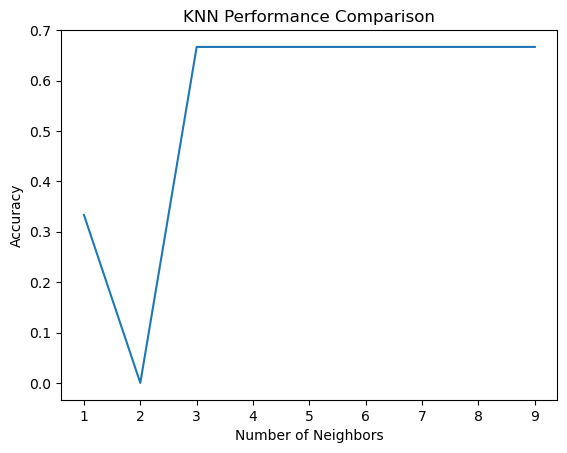

Best k: 3


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split data into features and labels
X = Gdp_neo.drop(['Country', 'IncomeGroup'], axis=1)
y = Gdp_neo['IncomeGroup']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and KNeighborsClassifier
pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

# Define a range of values for n_neighbors to test
k_values = range(1, 10)

# Fit the pipeline and test accuracy for each value of n_neighbors
accuracy_scores = []
for k in k_values:
    pipeline.set_params(knn__n_neighbors=k)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot the accuracy scores for each value of n_neighbors
plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Performance Comparison')
plt.show()

# Find the value of n_neighbors that gives the highest accuracy
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print('Best k: {}'.format(best_k))

In [55]:
accuracy_scores

[0.3333333333333333,
 0.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]